# ECE 570 Assignment 2 Instructions

## **Instructions**
This Jupyter notebook entitled **Assignment_02_Instructions** contains instructions for doing your assignment exercise.
A second Jupyter notebook entitled **Assignment_02_Exercise** contains all the exercises that you will need to perform.
A third Jupyter notebook entitled **uploader** contains code to generate an HTML version of your notebook, which you can then print and upload.  This avoids code or output being cutoff from the printout and should be used for uploading your PDF submission to Gradescope.

As you read each section of this instructions notebook, you should try running the associated code snippets.  The colaboratory environment allows you to run code snippets locally by clicking on the arrow on the left of the code. This is a wonderful feature that allows you to experiment as you read. You should take advantage of this and experiment and test different ideas, so you can become more familiar with the Python and the Jupyter programing environment.

At the end of each sub-section, there will be exercises to perform.
You should perform the exercises in the document **Assignment_02_Exercise**, which will contain all your results.
You can then hand in your results by printing the **Assignment_02_Exercise** document as a pdf with all code and simulation results included.

## Section 1: Introduction to Python

This section introduces basic Python semantics. The goal is to recap some important features in Python.


### Basics
The most frequently used native Python structure is the list. A list in Python has many useful properties. For example：


In [1]:
A = [1,2,3,4]

print(f'The length of A is {len(A)}')     # Length of A
print(f'A*3 prints to {A*3}')          # List multiplication
print(f'A+A prints to {A+A}')          # List concatanation
A.append('end')                   # Appending to a list
print(f'A appends a string gives {A}')

The length of A is 4
A*3 prints to [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
A+A prints to [1, 2, 3, 4, 1, 2, 3, 4]
A appends a string gives [1, 2, 3, 4, 'end']


**Important**: Python is a **0 index** language, which means all indices start at 0 (unlike in Matlab which starts at "1").

In [2]:
# Python
A = [0,1,2,3,4]
first = A[0]        # 0 indexing
last = A[-1]        # negative indexing (going from the last to the first)
print(f'first element is {first}, last element is {last}')

first element is 0, last element is 4


Moreover, lists are also iterable which is very useful in loops. In fact, all `for` loops in Python iterate over an iterable object or similar.

In [3]:
print('elements in A are:', end=' ')    # note the end parameter is '\n'(new line) by default
for item in A:
  print(item, end=' ')

elements in A are: 0 1 2 3 4 

#### Exercise 1:
Perform Exercise 1 in Jupyter notebook document **Assignment_02_Exercise**.



---



# Section 2: Introduction to data science packages
First, we will introduce two useful packages.

*   Numpy - Matrix processing package (See https://numpy.org/doc/stable/ for full documentation)
*   Matplotlib - Data visualization package (See https://matplotlib.org/stable/contents.html for full documentation)

In [ ]:
import numpy as np                # import the numpy packages and use the shorter name "np"
import matplotlib.pyplot as plt   # import matplotlib's pyplot package using the alias "plt"

In [ ]:
# An array can be initialized from a list with all numbers.
A = [0,1,2,3,4,5]
A = np.array(A, dtype='int32')
print(f'A: {A} which has the type {A.dtype}')

# Other ways to initialize a numpy array
A = np.zeros(5, dtype='float')          # initialize all elements zero
print(f'A: {A} which has the type {A.dtype}')
A = np.random.randint(low=0, high=10, size=5)  # initialize elements with random integer [0,10]
print(f'A: {A} which has the type {A.dtype}')

A: [0 1 2 3 4 5] which has the type int32
A: [0. 0. 0. 0. 0.] which has the type float64
A: [3 4 9 2 8] which has the type int64


In [ ]:
A = np.array([0,1,2,3,4,5])
print(f'A is {A}')

# Get the shape of the array
print(f'A has the shape {A.shape}')

# Array logic indexing
print(f'A[A>2] is {A[A>2]}')   # select all elements that are greater than 2

# Array slicing
print(f'A[:3] is {A[:3]}')     # first 3 elements
print(f'A[-3:] is {A[-3:]}')   # last 3 elements

# Array reshaping
# (Note -1 here is not an indication for the numbers of dimension,
#  just a special symbol that tells numpy to auto-compute the dimension.)
Anew = A.reshape(3,-1)   # -1 is automatically filled in with 2
print(f'A after reshaping \n{Anew}\nand the new shape is {Anew.shape}')

A is [0 1 2 3 4 5]
A has the shape (6,)
A[A>2] is [3 4 5]
A[:3] is [0 1 2]
A[-3:] is [3 4 5]
A after reshaping 
[[0 1]
 [2 3]
 [4 5]]
and the new shape is (3, 2)


Let's use matplotlib to plot two figures side by side while sharing the y axis.

<Figure size 1500x600 with 0 Axes>

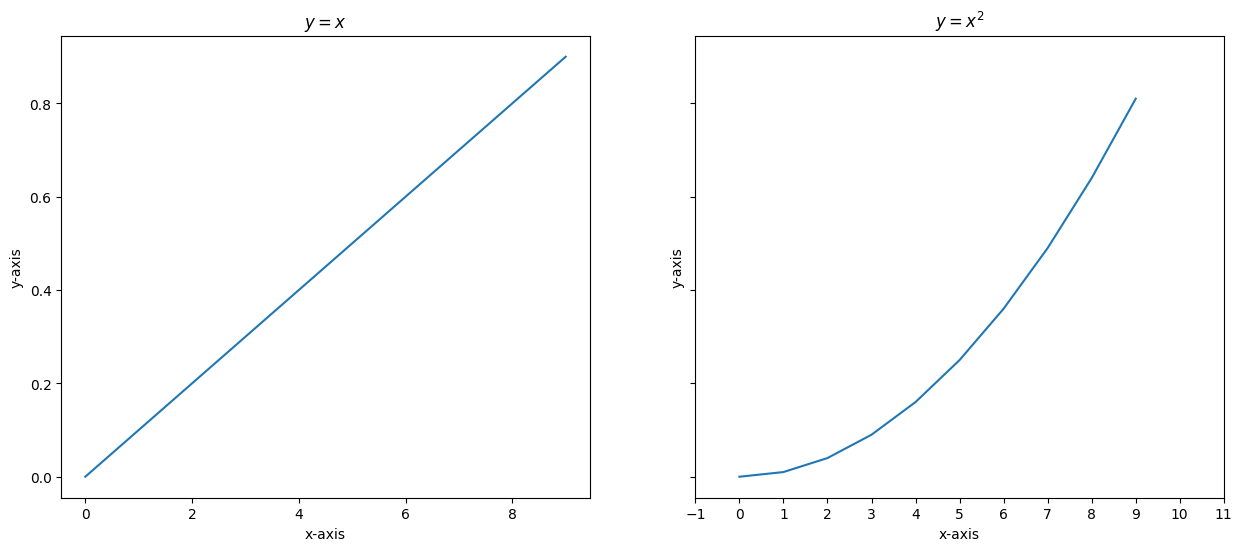

In [ ]:
Y = np.arange(0,1,0.1)          # initialize using the arange() function
X = range(len(Y))

plt.figure(figsize=(15,6))         # Create a figure with size 15 by 6
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6), sharey=True)  # Create a figure with an array of subplots
# Plot on first subfigure
ax = axes[0]
ax.plot(X,Y)               # Plot Y w.r.t X
ax.set_title('$y=x$')             # Give the current subplot a title which can be typed in Latex form
ax.set_xlabel('x-axis')            # give x label a name
ax.set_ylabel('y-axis')            # give y label a name

ax = axes[1]
ax.plot(X,Y**2)
ax.set_title('$y=x^2$')
ax.set_xlim(-1,11)              # Setting up the visual range for x-axis
ax.set_xticks(range(-1,12))          # Specify the ticks on the x-axis
ax.set_xlabel('x-axis')            # give x label a name
ax.set_ylabel('y-axis')            # give y label a name

plt.show()

There also exists Python packages for neural networks and deep learning. Here are some popular packages:

*   TensorFlow (Google)
*   PyTorch (Facebook)
*   MxNet (Apache/Microsoft/Amazon)

We will use some of these in later assignments.

#### Exercise 2
Perform Exercise 2 in Jupyter notebook document **Assignment_02_Exercise**.

----

# Section 3: A PCA algorithm for sparse data matrix

## Background on sparse matrices
Sparse matrices which contain many zeros are extremely useful in certain applications.  For example, a large graph such as a social network can be represented by an [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) in which the matrix value of the $i,j$-th element is 1 if and only if there is a connection between person $i$ and person $j$.  Suppose you are modeling a million people.  While the matrix is 1 million by 1 million, each person is only connected to maybe a few thousand other people.  Thus, the total number of entries is $(10^6)^2 = 10^{12}$ but the number of nonzeros is only $10^6 \times 1000 = 10^9$.  Thus, the memory savings alone is on the order of $1000$.  Additionally, matrix vector multiplications are significantly faster for very sparse matrices. The internal format of sparse matrices is outside the scope of this exercise but you can find more details here: https://en.wikipedia.org/wiki/Sparse_matrix.

## PCA for sparse matrices
In the next exercise, your task will be to find the first principal component vector of a **sparse matrix** (sparse data matrices are very useful but must be handled carefully to avoid extra computation as we will see).
Finding the first principal component is equivalent to finding the the top right singular vector of a centered zero-mean data matrix (or equivalently the top eigenvector of $X_c^T X_c$).
In particular, we will use the [power iteration](https://en.wikipedia.org/wiki/Power_iteration) method (see the linke for more details) as it only requires simple matrix vector and vector vector multiplications.
In order to accomplish this, we first give the power iteration algorithm for our sparse matrix $X$ in pseudo-code (as you will often see in papers)：
>Input: $X\in \cal{R}^{n \times p}$ (sparse matrix)   
>Output: $v_1$ (top right singular vector of centered matrix)   
>
>$\mu = \frac{1}{n}\sum_{i=1}^n x_i$  
>$v^{(0)} \sim \text{Normal}(0,I)$  
>
>For $i=1$ to $K$ iterations  
>$\quad\quad v = (X-\mathbb{1}\mu^T)^T (X-\mathbb{1}\mu^T)v^{(i-1)}$  
>$\quad\quad v^{(i)} = \frac{v}{\|v\|_2}$  
>Return $v^{(i)}$  

Notice that $\mu \in \cal{R}^p$ is the mean vector of $X$, and $\mathbb{1} \in \cal{R}^n$ is the column vector of all one's, i.e., $\mathbb{1}=[1,1,1,\cdots,1]^T$). Thus, $X_c = (X-\mathbb{1}\mu^T)$ is the centered data matrix where the mean is subtracted from every row.  This centering step is critical for performing PCA correctly via SVD.

### Efficient computation of algorithm for sparse matrices
The algorithm so far is mathematically well defined. However, notice the step
>$v = (X-\mathbb{1}\mu^T)^T (X-\mathbb{1}\mu^T)v^{(i-1)}$

This is not favorable in the sense that the matrix $X$ is sparse.  If the operations are performed in the order defined by the parenthesis, then the intermediate computation $(X-\mu \mathbb{1}^T)$ will not be sparse (i.e., because of the mean $\mu$ is not sparse, the resulting matrix will no longer be sparse).
This will destroy the benefit of using sparse matrices.
Therefore, instead of computing the vector $v$ like above, we can rearrange the computation for the above equation to achieve the following new equation based on properties of matrix products (a good exercise is to derive this reordering yourself):
>$v = (X-\mathbb{1}\mu^T)^T (X-\mathbb{1}\mu^T)v^{(i-1)}$

>$\hphantom{v} = (X^T-\mu\mathbb{1}^T) (X-\mathbb{1}\mu^T)v^{(i-1)}$

>$\hphantom{v} = (X^T X -\mu\mathbb{1}^T X - X^T\mathbb{1}\mu^T +\mu\mathbb{1}^T\mathbb{1}\mu^T)v^{(i-1)}$

>$\hphantom{v} = X^T Xv^{(i-1)} -\mu\mathbb{1}^T Xv^{(i-1)} - X^T\mathbb{1}\mu^Tv^{(i-1)} +\mu\mathbb{1}^T\mathbb{1}\mu^Tv^{(i-1)}$

>$\hphantom{v} = X^T (Xv^{(i-1)}) -\mu(\mathbb{1}^T (Xv^{(i-1)})) - (X^T\mathbb{1})(\mu^Tv^{(i-1)}) +\mu(\mathbb{1}^T\mathbb{1})(\mu^Tv^{(i-1)})$

The parenthesis on the last line show which computations should be computed first.
While mathematically, the last two lines are the same, the order of computation matters significantly when computing these.
In this way, we only need to compute multiplications between a sparse matrix and a vector (e.g., $Xv$ or $X^T \mathbb{1}$), which is much faster than dense matrix computations.
Also, we never need to form an intermediate dense matrices (e.g., $(X-\mathbb{1}\mu^T)$ or $(X^T X)$).
This demonstrates that while the mathematics may be the same for an abstract algorithm, the order of computation matters significantly when implemented on the computer.

### Sparse implementation in numpy
For implementing this in numpy, you will be creating sparse matrices via `csr_matrix` from the `scipy.sparse` package (a package that provides additional capabilities beyond standard numpy).  Note that all sparse matrices are 2D arrays; there is not really a sparse "vector"---rather like in MATLAB a sparse "vector" is just a 2D array in which one dimension happens to be 1. (Remember that numpy dense vectors are actually 1D arrays.) We provide some starter code to help with this.  In your code, everything except the input sparse matrix should just be a dense numpy 1D array.

To perform sparse matrix vector multiplication, you MUST use the `dot(v)` method of the sparse matrix, e.g., `X_sparse.dot(v)` rather than `np.dot(X_sparse, v)` or `np.matmul(X_sparse, v)`.  This is to ensure that the internal **sparse** matrix-vector multiplication is used.  We give a few examples below.

In [ ]:
from scipy.sparse import csr_matrix
X = np.random.randint(2, size=(4,2))
X_sparse = csr_matrix(X) # Create sparse matrix
print(type(X))
print(X)
print(type(X_sparse))
print(X_sparse)

print('Sparse matrix vector multiplication')
v = np.random.rand(X_sparse.shape[1])
out = X_sparse.dot(v) # Sparse matrix-vector multiplication
print(out)
print('Check with dense matrix vector multiplication')
out2 = X.dot(v)
print(out2)

<class 'numpy.ndarray'>
[[0 1]
 [0 1]
 [0 1]
 [0 1]]
<class 'scipy.sparse._csr.csr_matrix'>
  (0, 1)	1
  (1, 1)	1
  (2, 1)	1
  (3, 1)	1
Sparse matrix vector multiplication
[0.56684187 0.56684187 0.56684187 0.56684187]
Check with dense matrix vector multiplication
[0.56684187 0.56684187 0.56684187 0.56684187]


Below is a demo of various possible mistakes for doing sparse matrix-vector multiplication. The `X_sparse.dot(v)` is the correct version for sparse matrix-vector multiplication.

In [ ]:
X = np.array([[0,0,0],[1,0,1]])
print(f'X {type(X)}\n{X}')
X_sparse = csr_matrix(X)
print(f'X_sparse {type(X_sparse)}\n{X_sparse}')

v = np.random.RandomState(0).randn(X.shape[1])
print(f'v {type(v)}\n{v}')

# Normal dot product
print('---------')
print('Equivalent dot products')
print('np.dot(X,v)', np.dot(X, v))
print('X.dot(v)', X.dot(v))
print('X_sparse.dot(v)', X_sparse.dot(v)) # This is what you need to use in your code

# NOT a dot product since X_sparse is a sparse matrix
#  (It treats X_sparse as a single object and multiplies each by v)
print('--------- Not a matrix vector product ---------')
out = np.dot(X_sparse, v)
print('np.dot(X_sparse,v)\n', out)
print('Three matrices of np.dot')
print(out[0].toarray())
print(out[1].toarray())
print(out[2].toarray())

X <class 'numpy.ndarray'>
[[0 0 0]
 [1 0 1]]
X_sparse <class 'scipy.sparse._csr.csr_matrix'>
  (1, 0)	1
  (1, 2)	1
v <class 'numpy.ndarray'>
[1.76405235 0.40015721 0.97873798]
---------
Equivalent dot products
np.dot(X,v) [0.         2.74279033]
X.dot(v) [0.         2.74279033]
X_sparse.dot(v) [0.         2.74279033]
--------- Not a matrix vector product ---------
np.dot(X_sparse,v)
 [<2x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>
 <2x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>
 <2x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>]
Three matrices of np.dot
[[0.         0.         0.        ]
 [1.76405235 0.         1.76405235]]
[[0.         0.         0.        ]
 [0.40015721 0.         0.40015721]]
[[0.         0.         0.        ]
 [0.97873798 0.         0.97873798]]


#### Exercise 3
Perform Exercise 3 in Jupyter notebook document **Assignment_01_Exercise**.

----

# Appendix: Other useful Python/Numpy tips (Highly recommended for reading)

### Important Tip: Whenever possible, avoid using `range` or indices like `i` and `j` for loops
Using `range` or indices is very prone to error when looping over lists/arrays or any other list-like object (though common in other languages such as C++ or Matlab.
Thus, I suggest avoiding using indices for looping (unless you just want to print out the list number for debugging purposes, look up the Python function `enumerate`).
One usual exception to this is for doing multiple iterations of an algorithm.

Instead, use Python's simple iterator interface to loop over lists or arrays.  You should be able to find tutorials online that explain python iterators and the for loop in more detail.

### `zip(a,b,...)` can be very useful for iterating over multiple lists that correspond to each other
**Note:** `zip` will only match elements up to the **shortest** iterable. For example `zip([1,2], ['a'])` will only produce one item `(1,a)` since the second list only has one item.

In [ ]:
num_arr = 10*np.arange(10)
char_list = ['a','b','c','d']

for n, c in zip(num_arr, char_list):
    print('n=', n, 'c=', c)

for n, c, xvec in zip(num_arr, char_list, X):
    print('n=', n, 'c=', c, 'xvec=', xvec)

n= 0 c= a
n= 10 c= b
n= 20 c= c
n= 30 c= d
n= 0 c= a xvec= [0 0 0]
n= 10 c= b xvec= [1 0 1]


In [ ]:
# Loop through first 10 x-y pairs
x = np.arange(0,2,0.1)
y = x**2

for xx, yy in zip(x[:10], y[:10]):
  print('x=', xx, 'y=', yy)

print('Note: Here tells you the rounding error for numpy operations')

x= 0.0 y= 0.0
x= 0.1 y= 0.010000000000000002
x= 0.2 y= 0.04000000000000001
x= 0.30000000000000004 y= 0.09000000000000002
x= 0.4 y= 0.16000000000000003
x= 0.5 y= 0.25
x= 0.6000000000000001 y= 0.3600000000000001
x= 0.7000000000000001 y= 0.4900000000000001
x= 0.8 y= 0.6400000000000001
x= 0.9 y= 0.81
Note: Here tells you the rounding error for numpy operations


### _List Comprehensions_ are also very useful and include MAP and FILTER operations

- Suppose you want to map a list of numbers to a list of strings
- Suppose you only want to map odd numbers
- Syntax `[<expression> for <item> in <iterable> if <condition>]`

In [ ]:
num_list = [1, 2, 3, 4, 5]
str_list = []
for i in range(len(num_list)):
    str_list.append('Num:' + str(num_list[i]))
print('With index loops')
print(str_list)

# Use iterators
str_list = []
for n in num_list:
    str_list.append('Num:' + str(n))
print('With iterator loops')
print(str_list)

# Use list comprehension
str_list = ['Num:' + str(n) for n in num_list]
print('With list comprehension')
print(str_list)

# Use list comprehension
str_list = ['Num:' + str(n) for n in num_list if np.mod(n, 2) == 1]
print('Odd numbers only with list comprehension')
print(str_list)

With index loops
['Num:1', 'Num:2', 'Num:3', 'Num:4', 'Num:5']
With iterator loops
['Num:1', 'Num:2', 'Num:3', 'Num:4', 'Num:5']
With list comprehension
['Num:1', 'Num:2', 'Num:3', 'Num:4', 'Num:5']
Odd numbers only with list comprehension
['Num:1', 'Num:3', 'Num:5']


### Numpy reduction functions
- Numpy includes many useful **reduction** functions such as `np.sum`, `np.mean`, `np.prod`, `np.min`, `np.max`, etc.
- The `axis` argument is important and is interpreted as follows:
  1. If no axis argument, then just apply to all numbers in all dimensions.
  2. If axis argument given, then apply the reduction along that dimension and leave other dimensions alone.

In [ ]:
A = np.arange(3*4).reshape(3, 4)
print(A)

print('With no argument, it is the total sum', np.sum(A))
print('With axis=0, it sums along the first dimension (i.e. along the rows)')
print(np.sum(A, axis=0))
print('With axis=1, it sums along the second dimension (i.e. along the columns)')
print(np.sum(A, axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
With no argument, it is the total sum 66
With axis=0, it sums along the first dimension (i.e. along the rows)
[12 15 18 21]
With axis=1, it sums along the second dimension (i.e. along the columns)
[ 6 22 38]


### Use Array.shape often
Vector and matrix calculation could be confusing sometimes, and it is even more confusing in Numpy. Numpy has broadcasting mechanism to help some special calculation which brings not only convenience but also bugs that is hard to find. To get more understanding about Numpy broadcasting, you could visit https://numpy.org/doc/stable/user/basics.broadcasting.html. Though currently this is not required.

One way to avoid mistakes is to check the dimensions of your numpy array often. Suppose you want to calculate matrix multiplication C=AB where A is 3 by 4 and B is 4 by 1.

In [ ]:
import numpy as np

A = np.arange(3*4).reshape(3, 4)
B = np.arange(1*4).reshape(1, 4)

print('A@B cannot be multiplied now.')


print('You can check the shape by A.shape and B.shape')
print(A.shape, B.shape)
print('Oops! Here is something wrong! Let\'s fix it'.)

A = np.arange(3*4).reshape(3, 4)
B = np.arange(1*4).reshape(4, 1)
print(A.shape, B.shape)
print('The code is good now.')

print('Checking the shape could help you find some other bugs.')

A = np.arange(3*4).reshape(3, 4)
B = np.arange(1*4).reshape(4)

print(A.shape, B.shape)
print(A*B)
print((A*B).shape)

print("Though this could does raise any error, it is not what we intended to do! The result should have shape 3 by 1! By checking the shape, we found another bug! What we want is matrix multiplication! This gives us numerical multipilication (with broadcasting).")

print("It should be A@B instead of AB")

print(A@B)

SyntaxError: invalid syntax (632902962.py, line 11)

### Use of time.time()

In [ ]:
import time

start = time.time()
for _ in range(1000000):
    pass
end = time.time()
print(end - start)

0.016202926635742188
